In [4]:
!pip install scikit-learn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

In [6]:
data = pd.read_csv("/Users/tusshar/KNN-Classifier/data/Healthcare_Data_Preprocessed.csv")

In [7]:
data["Age"] = data["Age"].apply(lambda x: 0 if x < 0 else x)
numerical_cols = ['Age','BMI','Blood_Pressure','Cholesterol','Glucose_Level','Heart_Rate','Sleep_Hours','Exercise_Hours','Water_Intake',
                 'Stress_Level']

for cols in numerical_cols:
    data[cols] = pd.to_numeric(data[cols], errors='coerce').fillna(data[cols].median())


categorical_cols = ['Smoking','Alcohol','Diet','MentalHealth', 'PhysicalActivity', 'MedicalHistory', 'Allergies']

for cols in categorical_cols:
    data[cols] = pd.to_numeric(data[cols], errors='coerce').fillna(0).astype(int)

boolean_cols = ['Diet_Type_Vegan', 'Diet_Type_Vegetarian','Blood_Group_AB', 'Blood_Group_B', 'Blood_Group_O']

for cols in boolean_cols:
    data[cols] = data[cols].map({"True":1, "False":0}).fillna(0).astype(int)





In [8]:
data['Target'] = data['Target'].astype(int)

In [9]:
X = data.drop('Target', axis=1)
y = data['Target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [12]:
k_values = list(range(1,51))
mean_accuracies = []
std_accuracies = []

for k in k_values:
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    cv_results = cross_validate(pipeline, X_train , y_train, cv=kf , scoring = 'accuracy' , n_jobs = -1)
    mean_accuracies.append(cv_results['test_score'].mean())
    std_accuracies.append(cv_results['test_score'].std())
    print(f"k={k}: Mean Accuracy = {cv_results['test_score'].mean():.4f} ± {cv_results['test_score'].std():.4f}")

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)
print(f"\nBest k: {best_k} with Mean Cross-Validation Accuracy: {best_accuracy:.4f}")

    
    

k=1: Mean Accuracy = 0.7684 ± 0.0104
k=2: Mean Accuracy = 0.7534 ± 0.0060
k=3: Mean Accuracy = 0.8076 ± 0.0094
k=4: Mean Accuracy = 0.8015 ± 0.0059
k=5: Mean Accuracy = 0.8207 ± 0.0054
k=6: Mean Accuracy = 0.8155 ± 0.0065
k=7: Mean Accuracy = 0.8269 ± 0.0086
k=8: Mean Accuracy = 0.8276 ± 0.0057
k=9: Mean Accuracy = 0.8321 ± 0.0068
k=10: Mean Accuracy = 0.8261 ± 0.0052
k=11: Mean Accuracy = 0.8310 ± 0.0059
k=12: Mean Accuracy = 0.8293 ± 0.0046
k=13: Mean Accuracy = 0.8334 ± 0.0040
k=14: Mean Accuracy = 0.8336 ± 0.0047
k=15: Mean Accuracy = 0.8376 ± 0.0039
k=16: Mean Accuracy = 0.8330 ± 0.0040
k=17: Mean Accuracy = 0.8367 ± 0.0042
k=18: Mean Accuracy = 0.8345 ± 0.0049
k=19: Mean Accuracy = 0.8396 ± 0.0045
k=20: Mean Accuracy = 0.8356 ± 0.0071
k=21: Mean Accuracy = 0.8401 ± 0.0087
k=22: Mean Accuracy = 0.8361 ± 0.0079
k=23: Mean Accuracy = 0.8386 ± 0.0091
k=24: Mean Accuracy = 0.8376 ± 0.0080
k=25: Mean Accuracy = 0.8388 ± 0.0092
k=26: Mean Accuracy = 0.8394 ± 0.0089
k=27: Mean Accuracy =

In [13]:
final_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))
final_pipeline.fit(X_train,y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,27
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [14]:
y_pred = final_pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [15]:
print(f"Accuracy : {accuracy:.4f}")
print(f"Precison : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1 score : {f1:.4f}")



Accuracy : 0.8340
Precison : 0.8404
Recall : 0.8218
F1 score : 0.8310


In [16]:
perm_importance = permutation_importance(final_pipeline, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


print(feature_importance)

                 Feature  Importance
1                    BMI     0.13880
2         Blood_Pressure     0.08250
3            Cholesterol     0.07200
5             Heart_Rate     0.03895
4          Glucose_Level     0.03445
6            Sleep_Hours     0.00120
7         Exercise_Hours     0.00120
8           Water_Intake     0.00120
9           Stress_Level     0.00120
21         Blood_Group_O     0.00000
17       Diet_Type_Vegan     0.00000
20         Blood_Group_B     0.00000
19        Blood_Group_AB     0.00000
18  Diet_Type_Vegetarian     0.00000
13          MentalHealth    -0.00010
15        MedicalHistory    -0.00030
0                    Age    -0.00060
11               Alcohol    -0.00110
16             Allergies    -0.00155
10               Smoking    -0.00280
14      PhysicalActivity    -0.00315
12                  Diet    -0.00340


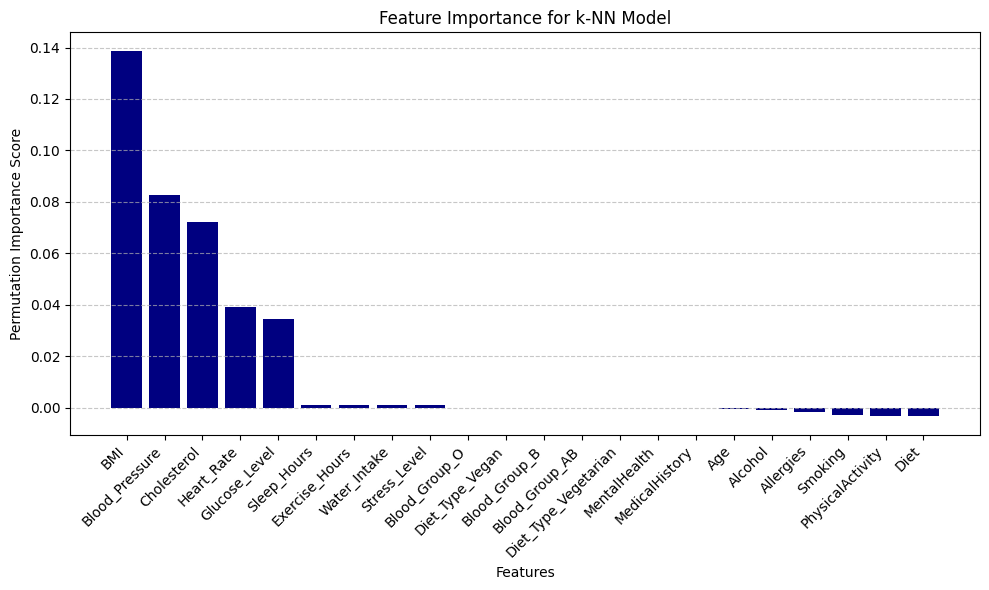

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='navy')
plt.xlabel('Features')
plt.ylabel('Permutation Importance Score')
plt.title('Feature Importance for k-NN Model')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

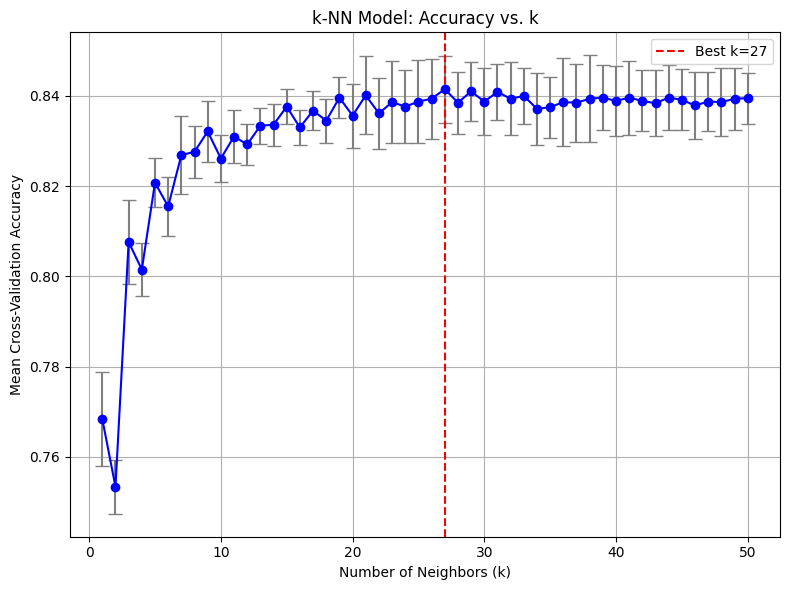

In [18]:
plt.figure(figsize=(8, 6))
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='o-', color='blue', ecolor='gray', capsize=5)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('k-NN Model: Accuracy vs. k')
plt.grid(True)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
sample_predictions = pd.DataFrame({
    'Individual': [f'Person {i+1}' for i in range(5)],
    'Predicted_Health': final_pipeline.predict(X_test.head(5))
})
sample_predictions['Predicted_Health'] = sample_predictions['Predicted_Health'].map({0: 'Healthy', 1: 'Unhealthy'})

In [20]:
print(sample_predictions)


  Individual Predicted_Health
0   Person 1          Healthy
1   Person 2        Unhealthy
2   Person 3        Unhealthy
3   Person 4        Unhealthy
4   Person 5        Unhealthy
